<a href="https://colab.research.google.com/github/khanfs/ComputationalBiology-xGenomics/blob/main/ChEMBL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ChEMBL Database**

ChEMBL is a [database](https://www.ebi.ac.uk/chembl/) of manually extracted and curated Structure-Activity Relationship data from the medicinal chemistry literature, bringing together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs. ChEMBL provides 2D structures of bioactive molecules with drug-like properties, capturing the association between a ligand and a biological target in the form of an experimentally measured activity end-point, e.g. half-maximal inhibitory concentration (**IC50**). Other calculated properties are provided, such as logP, Molecular Weight, Lipinski Parameters, etc. Also, abstracted bioactivities, e.g. binding constants, pharmacology and ADMET data. The database as of 22 February 2022 contains: 

* 2,786,911 compound records
* 2,157,379 compounds (of which 2,136,187 have mol files)
* 19,286,751 activities
* 1,458,215 assays
* 14,855 targets
* 84,092 documents.   

## **ChEMBL API**

[ChEMBL on GitHub](https://github.com/chembl) provides the official Python client library for the ChEMBL webresource client. The library helps access ChEMBL data and cheminformatics tools using Python. Resources on how to use the client library are in the GitHub repository.

Molecule records may be [retrieved in several ways](https://hub.gke2.mybinder.org/user/chembl-chembl_webresource_client-rcnuez6z/notebooks/demo_wrc.ipynb), such as lookup of single molecules using various identifiers or searching for compounds via similarity. Also, run other queries, e.g. approved drugs by disease, year or name, etc. 

**Resources:** 
* [ChEMBL Data Web Services](https://chembl.gitbook.io/chembl-interface-documentation/web-services/chembl-data-web-services)
* [ChEMBL Data Questions](https://chembl.gitbook.io/chembl-interface-documentation/frequently-asked-questions/chembl-data-questions)
* [ChEMBL webresource client GitHub repository](https://github.com/chembl/chembl_webresource_client)
* [ChEMBL Live Jupyter notebook with examples](http://beta.mybinder.org/v2/gh/chembl/chembl_webresource_client/master?filepath=demo_wrc.ipynb)
* [ChEMBL web services API live documentation Explorer](https://www.ebi.ac.uk/chembl/api/data/docs)

**References:** 
* [myChEMBL: a virtual machine implementation of open data and cheminformatics tools](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3892694/)
* [ChEMBL web services: streamlining access to drug discovery data and utilities](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4489243/#__ffn_sectitle)
* [Activity, assay and target data curation and quality in the ChEMBL database](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4607714/)
*  [ChEMBL Beaker: A Lightweight Web Framework Providing Robust and Extensible Cheminformatics Services](https://www.mdpi.com/2078-1547/5/2/444/htm) 
* [Want Drugs? Use Python](https://arxiv.org/abs/1607.00378)

###**1. Connect to ChEMBL Database**

In [ ]:
# Import packages, modules and libraries 
import math # Module extends list of mathematical functions
from pathlib import Path # Module provides an object API for working with files and directories
from zipfile import ZipFile # Module to create, read, write, append, and list a ZIP file
from tempfile import TemporaryDirectory # Module for working with temporary files
from tqdm.auto import tqdm # Library generates progress bar to track the execution of iterable code

import pandas as pd # Package for data manipulation and analysis
import numpy as np # Package for scientific computing 

**Install NBVAL**: plugin to pytest, checks outputs saved in the past is consistent with outputs computed today [(arXiv:2001.04808)](https://arxiv.org/abs/2001.04808).

In [ ]:
# Install NBVAL to test notebook for errors
! pip install nbval

In [ ]:
# Install ChEMBL library to access ChEMBL data and cheminformatics tools
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import ChEMBL library settings to use library 
from chembl_webresource_client.settings import Settings

In [ ]:
# Import new_client object imports the new functions of the library
from chembl_webresource_client.new_client import new_client

In [ ]:
# Create resource objects for API access
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [ ]:
# Type() function returns the data type of the object passed to it as an argument
type(targets_api)

chembl_webresource_client.query_set.QuerySet

###**2. Get Target Data**

* Get UniProt ID of the target of interest from UniProt website
* Use UniProt ID to get target information


In [ ]:
uniprot_id = "P0C6X7" # SARS-CoV-1 

Fetch target data from ChEMBL

In [ ]:
# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


Download target data from ChEMBL

In [ ]:
targets = pd.DataFrame.from_records(targets)
targets

,organism,pref_name,target_chembl_id,target_type
0,SARS coronavirus,Replicase polyprotein 1ab,CHEMBL5118,SINGLE PROTEIN
1,SARS coronavirus,Replicase polyprotein 1ab,CHEMBL5118,SINGLE PROTEIN


Select target (target ChEMBL ID)

In [ ]:
target = targets.iloc[1] # iloc is Pandas function which selects rows and columns at specific integer position
target

organism                     SARS coronavirus
pref_name           Replicase polyprotein 1ab
target_chembl_id                   CHEMBL5118
target_type                    SINGLE PROTEIN
Name: 1, dtype: object

Save selected ChEMBL ID

In [ ]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")
# NBVAL_CHECK_OUTPUT

The target ChEMBL ID is CHEMBL5118


### **Biological Activity**

[Biological activity](https://www.sciencedirect.com/science/article/pii/B9780128241356000131) is “the capacity of a specific molecular entity to achieve a defined biological effect” on a target (Jackson et al., 2007), and it is measured by the activity or concentration of a molecule required to cause that activity, and biological activity is always measured by biological assay. Biological activity is always depend on the dose that given to the living organism, so it is logically to show either beneficial or adverse effect that range from low to high. Activity depends mainly on the action of the “absorption, distribution, metabolism, and excretion,” (ADME) measurement. To be an active medicine, a compound not only must be active against a target, but also possess the exact ADME characteristics that let it be utilized as a drug (Jagan et al., 2012). 

Biological activity occurs as a result of certain effects from exposure to a molecule. These influences a metabolic or physiological response. The evaluation of biological activity requires test systems, which are in the body of the organism, and acquire signals, mainly spectrophotometry, or photometry, in parallel experiments of different concentrations of test samples and comparison with control samples. In such tests, computational systems are needed to process, store, sort and visualize data using appropriate mathematical or statistical models to interpret and evaluate results and link sets of data and signals from various origins (Wolfram & Trifan, 2018). 

There are many types of biological activities e.g. antimicrobial, antifungal, antioxidant, antitumor, anticancer, antimalarial, anti-tuberculosis, anti-inflammatory, anti-aging, anti-proliferative, hypoglycemic, hypocholesterolemic, antihypertensive activities [(Mariod et al. 2022)](https://www.sciencedirect.com/science/article/pii/B9780128241356000131).

####**Compound Activity Measures**
Absorption, distribution, metabolism, and excretion (**ADME**) - pharmacokinetic properties - are the main action used to measure biological activity. In other words, bioactivity describes the beneficial or adverse effects of a drug on living matter. [Most used activity types](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/inhibitory-concentration-50):

* **IC50:** Inhibitory Concentration 50%, the molar concentration of an antagonist/inhibitor that reduces the response to an agonist by 50% (ICx – other percentage values can be specified)
* **A2:** the molar concentration of an antagonist that requires double concentration of the agonist to elicit the same submaximal response, obtained in the absence of antagonist
* **EC50:** Effective Concentration 50%, the molar concentration of an agonist/substrate that produces 50% of the maximal possible effect (or reaction velocity) of that agonist (substrate)
* **ED50** Effective Dose 50%, the dose of a drug that produces, on average, a specified all-or-none response in 50% of a test population or, if the response is graded, the dose that produces 50% of the maximal response to that drug
* **Ki, Kd** – inhibition respectively direct binding experiment equilibrium dissociation constants.

#### **Half-maximal inhibitory concentration (IC50)** 
IC50 is the most widely used and informative measure of a drug's efficacy. It indicates how much drug is needed to inhibit a biological process by half, thus providing a measure of potency of an antagonist drug in pharmacological research. Most approaches to determine IC50 of a pharmacological compound are based on assays that utilise whole cell systems. While they generally provide outstanding potency information, results can depend on the experimental cell line used and may not differentiate a compound's ability to inhibit specific interactions [(Aykul S and Martinez-Hackert 2016)](https://pubmed.ncbi.nlm.nih.gov/27365221/).

**Resources:**
* [DrugBank Glossary](https://dev.drugbank.com/guides/terms)

**Publications:**
* [Bioactivity descriptors for uncharacterized chemical compounds](https://www.nature.com/articles/s41467-021-24150-4)

***Image***: *By JesseAlanGordon - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=25052308*

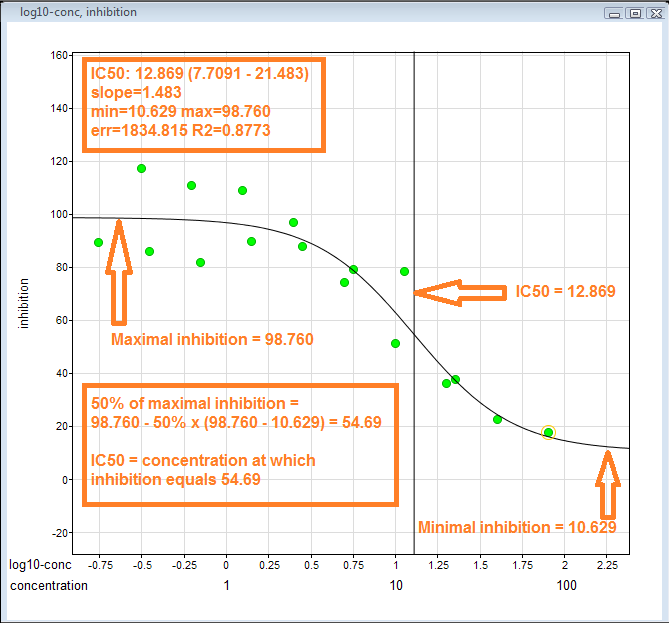

In [7]:
from IPython.display import Image
Image ('https://upload.wikimedia.org/wikipedia/commons/8/81/Example_IC50_curve_demonstrating_visually_how_IC50_is_derived.png')

###**3. Get Bioactivity Data**

Fetch the bioactivity data and filter according to:

* human proteins
* bioactivity type IC50,
* exact measurements (relation '='), and
* binding data (assay type 'B')

In [ ]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 177, <class 'chembl_webresource_client.query_set.QuerySet'>


In [ ]:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 1988091,
 'assay_chembl_id': 'CHEMBL898907',
 'assay_description': 'Inhibition of SARS-CoV 3C-like protease by FRET based microplate assay',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL194398',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '870000.0',
 'target_chembl_id': 'CHEMBL5118',
 'target_organism': 'SARS coronavirus',
 'type': 'IC50',
 'units': 'uM',
 'value': '870.0'}

Download bioactivity data from ChEMBL

In [ ]:
bioactivities_df = pd.DataFrame.from_records(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (178, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,1988091,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL194398,=,nM,870000.0,CHEMBL5118,SARS coronavirus,IC50,uM,870.0
1,1988091,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL194398,=,nM,870000.0,CHEMBL5118,SARS coronavirus,IC50,uM,870.0
2,1988092,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL393608,=,nM,200000.0,CHEMBL5118,SARS coronavirus,IC50,uM,200.0
3,1988093,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL238216,=,nM,300000.0,CHEMBL5118,SARS coronavirus,IC50,uM,300.0
4,1988094,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL235873,=,nM,15000.0,CHEMBL5118,SARS coronavirus,IC50,uM,15.0


In [ ]:
bioactivities_df.columns

Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'standard_units', 'standard_value',
       'target_chembl_id', 'target_organism', 'type', 'units', 'value'],
      dtype='object')

In [ ]:
bioactivities_df["units"].unique()

array(['uM'], dtype=object)

In [ ]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1988091,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL194398,=,nM,870000.0,CHEMBL5118,SARS coronavirus,IC50
1,1988091,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL194398,=,nM,870000.0,CHEMBL5118,SARS coronavirus,IC50
2,1988092,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL393608,=,nM,200000.0,CHEMBL5118,SARS coronavirus,IC50
3,1988093,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL238216,=,nM,300000.0,CHEMBL5118,SARS coronavirus,IC50
4,1988094,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL235873,=,nM,15000.0,CHEMBL5118,SARS coronavirus,IC50


**Preprocess and filter bioactivity data**:

1. Convert standard_value’s datatype from object to float
2. Delete entries with missing values
3. Keep only entries with standard_unit == nM
4. Delete duplicate molecules
5. Reset DataFrame index
6. Rename columns


**1. Convert datatype of “standard_value” from “object” to “float”**

The field standard_value holds standardized (here IC50) values. In order to make these values usable in calculations later on, convert values to floats.

In [ ]:
bioactivities_df.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
dtype: object

In [ ]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

**2. Delete entries with missing values**

Use the parameter inplace=True to drop values in the current DataFrame directly.

In [ ]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (178, 11)


**3. Keep only entries with “standard_unit == nM”**

We only want to keep bioactivity entries in nM, so we remove all entries with other units.

In [ ]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [ ]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [ ]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (178, 11)


**4. Delete duplicate molecules**

In [ ]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (152, 11)


**5. Reset “DataFrame” index**

In [ ]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1988091,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL194398,=,nM,870000.0,CHEMBL5118,SARS coronavirus,IC50
1,1988092,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL393608,=,nM,200000.0,CHEMBL5118,SARS coronavirus,IC50
2,1988093,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL238216,=,nM,300000.0,CHEMBL5118,SARS coronavirus,IC50
3,1988094,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL235873,=,nM,15000.0,CHEMBL5118,SARS coronavirus,IC50
4,1988095,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL397154,=,nM,10000.0,CHEMBL5118,SARS coronavirus,IC50


**6. Rename columns**

In [ ]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,1988091,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL194398,=,nM,870000.0,CHEMBL5118,SARS coronavirus,IC50
1,1988092,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL393608,=,nM,200000.0,CHEMBL5118,SARS coronavirus,IC50
2,1988093,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL238216,=,nM,300000.0,CHEMBL5118,SARS coronavirus,IC50
3,1988094,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL235873,=,nM,15000.0,CHEMBL5118,SARS coronavirus,IC50
4,1988095,CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,CHEMBL397154,=,nM,10000.0,CHEMBL5118,SARS coronavirus,IC50


In [ ]:
bioactivities_df.columns

Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [ ]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (152, 11)


###**4. Get compound data**

1. Fetch and download compound data
2. Preprocess and filter compound data

We have a DataFrame containing all molecules tested against target with the respective measured bioactivity.

Now, we want to get the molecular structures of the molecules that are linked to respective bioactivity ChEMBL IDs.

**1. Fetch compound data from ChEMBL**

Let’s have a look at the compounds from ChEMBL which we have defined bioactivity data for: We fetch compound ChEMBL IDs and structures for the compounds linked to our filtered bioactivity data.

In [ ]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

**Download compound data from ChEMBL**

When data volume is high, exporting QuerySet object into a pandas.DataFrame can take time, so we obtain list of records through tqdm. We pass list of compounds to the DataFrame.

In [ ]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (152, 2)


In [ ]:
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL28,{'canonical_smiles': 'O=c1cc(-c2ccc(O)cc2)oc2c...
1,CHEMBL8145,{'canonical_smiles': 'O=c1c(-c2ccc(O)cc2)coc2c...
2,CHEMBL50,{'canonical_smiles': 'O=c1c(O)c(-c2ccc(O)c(O)c...
3,CHEMBL12798,{'canonical_smiles': 'COC(=O)[C@]1(C)CCC[C@]2(...
4,CHEMBL151,{'canonical_smiles': 'O=c1cc(-c2ccc(O)c(O)c2)o...


**2. Preprocess and filter compound data**

1. Remove entries with missing entries
2. Delete duplicate molecules (by molecule_chembl_id)
3. Get molecules with canonical SMILES

**1. Remove entries with missing molecule structure entry**

In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (152, 2)


**2. Delete duplicate molecules**

In [ ]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (152, 2)


**3. Get molecules with canonical SMILES**

So far, we have multiple different molecular structure representations. We only want to keep the canonical SMILES.

In [ ]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [ ]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (152, 2)


Remove all molecules without a canonical SMILES string.

In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (152, 2)


###**5. Output bioactivity-compound data**

1. Merge bioactivity and compound data, and add pIC50 values
2. Draw molecules with highest pIC50
3. Freeze bioactivity data to ChEMBL 27
4. Write output file

**Summary of compound and bioactivity data**

In [ ]:
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 152


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [ ]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 152


Index(['molecule_chembl_id', 'smiles'], dtype='object')

**1. Merge both datasets**

Merge values of interest from bioactivities_df and compounds_df in an output_df based on the compounds’ ChEMBL IDs (molecule_chembl_id), keeping the following columns:

* ChEMBL IDs: molecule_chembl_id
* SMILES: smiles
* units: units
* IC50: IC50

In [ ]:
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 152 entries.


In [ ]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
smiles                 object
dtype: object

In [ ]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL194398,870000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...
1,CHEMBL393608,200000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
2,CHEMBL238216,300000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CHEMBL235873,15000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,CHEMBL397154,10000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
5,CHEMBL238217,80000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
6,CHEMBL196635,800000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
7,CHEMBL492571,5400.0,nM,O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccccc2)c1
8,CHEMBL522710,11000.0,nM,O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccc(Cl)cc2)c1
9,CHEMBL492771,13600.0,nM,O=C(O)/C(O)=C/C(=O)c1cccc(OCc2ccc(Cl)cc2)c1


**Add pIC50 values**

IC50 values are difficult to read (values are distributed over multiple scales), **which is why we convert the IC50 values to pIC50**.

In [ ]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [ ]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [ ]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL194398,870000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,3.060481
1,CHEMBL393608,200000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,3.698970
2,CHEMBL238216,300000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,3.522879
3,CHEMBL235873,15000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,4.823909
4,CHEMBL397154,10000.0,nM,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,5.000000


**Draw compound data**

Plot the pIC50 value distribution:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f9d09c50>]],
      dtype=object)

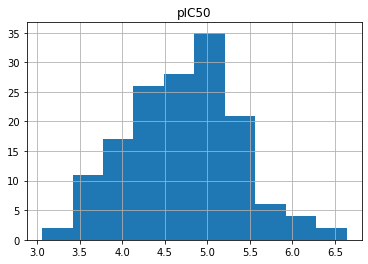

In [ ]:
output_df.hist(column="pIC50")

In the next steps, we add a column for RDKit molecule objects to our DataFrame and look at the structures of the molecules with the highest pIC50 values.

#### **RDKit**
RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python for building predictive models for ADME, Tox, and biological activity. RDKit package consists of the rdkit.Chem package, which consists of sub-packages and sub-modules that enable us to:

* Convert [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) strings into 2D and 3D molecular structures
* Convert molecular structure into a SMILES string
* Draw and visualise molecules
* Compute molecular weights
* Use [SMARTS](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification) to verify whether a molecule has a ring
* Search for substructures
* Construct chemical reactions 
* Modify and fragment molecules
* Draw chemical reactions 
* Generate molecular fingerprints and use them to calculate molecular similarity
* Calculate and visualise [molecular descriptors](https://en.wikipedia.org/wiki/Molecular_descriptor)

There are many more features and functions. Use RDKIt to build features of machine learning model.   

**Resources:**

* [rdkit.Chem package](https://www.rdkit.org/docs/source/rdkit.Chem.html)
* [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html)
* [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)
* [List of All Available Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)
* [RDKit GitHub](https://github.com/rdkit/rdkit) 

In [ ]:
# Install RDKit
! pip install rdkit-pypi -qqq

In [ ]:
from rdkit import Chem
from rdkit.Chem import PandasTools

In [ ]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [ ]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

Show the three most active molecules, i.e. molecules with the highest pIC50 values.

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL2441741,230.0,nM,6.638272,
1,CHEMBL221366,500.0,nM,6.301030,
2,CHEMBL2441745,610.0,nM,6.214670,

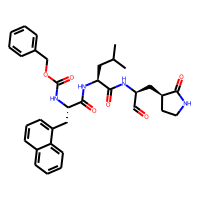
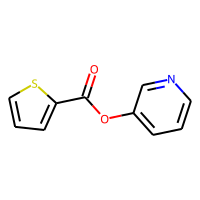
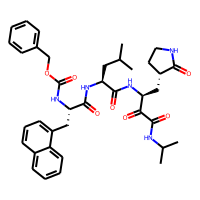

In [ ]:
output_df.drop("smiles", axis=1).head(3)

In [ ]:
# Save dataset without ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (152, 5)


In [ ]:
# Save bioactivity data in a CSV file
output_df.to_csv('SARS-CoV-1_Compounds.csv', index=False)
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL2441741,230.0,nM,CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...,6.638272
1,CHEMBL221366,500.0,nM,O=C(Oc1cccnc1)c1cccs1,6.301030
2,CHEMBL2441745,610.0,nM,CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...,6.214670
3,CHEMBL1876821,940.0,nM,CN(CC(=O)NC1CCCC1)S(=O)(=O)c1cccc(Cl)c1,6.026872
4,CHEMBL3099526,1040.0,nM,CC1CCN(S(=O)(=O)c2ccc3c(c2)C(=O)C(=O)N3C)CC1,5.982967


In [ ]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (152, 5)


In [ ]:
# Mount Google Drive into Colab so have access to Google drive from within Colab
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Create SARS-CoV-1 data folder in Colab Notebooks folder on Google Drive
! mkdir "/content/gdrive/My Drive/Colab Notebooks/SARS-CoV-1 Data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/SARS-CoV-1 Data’: File exists


In [ ]:
# Copy compounds data CSV to folder
! cp SARS-CoV-1_Compounds.csv "/content/gdrive/My Drive/Colab Notebooks/SARS-CoV-1 Data"